<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

np.random.seed(234234) # random seed for consistency

##classification problem - two class - binary class - class 0 & 1

## A1 , A2 , A3 - Column - DIMENSION 
## N numbers -
## Class 1 - 20 rows 
## Class 0 - rows 

### OVERALL 3 Dimnesion  cross 40 rows 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [2]:
# Using the code above, we created two 3×20 datasets - one dataset for each class ω1 and ω2 -
# where each column can be pictured as a 3-dimensional vector so that our dataset will have the form
class2_sample

array([[ 1.33927692e+00,  1.04533022e+00,  2.20180459e+00,
         1.27000938e+00,  6.48649205e-01,  1.16885224e+00,
         1.80740635e+00,  1.82744309e+00,  6.47500635e-01,
         1.22668012e+00, -1.76179330e+00,  1.41463884e+00,
         2.82638653e+00, -4.30159131e-01, -7.44355343e-01,
         2.44985013e+00,  2.23159994e+00,  5.83532196e-01,
         3.60364970e-01,  1.20272812e+00],
       [ 5.34101721e-01,  7.19207842e-01,  3.72773183e-02,
         1.02642104e+00, -5.65153921e-01,  2.93948552e-01,
         4.69329255e-01, -5.98422735e-01,  1.05878502e+00,
         3.36410235e+00,  1.15937465e+00,  7.33659070e-01,
         1.03379515e+00,  1.41715827e+00, -1.01971624e+00,
         2.58619045e+00,  7.68555992e-01,  5.81854561e-01,
         5.63985751e-01,  7.00883781e-01],
       [ 9.98371208e-01,  2.20727547e+00,  3.35819851e-01,
         1.56398838e+00,  2.49342120e+00, -1.13093464e-01,
         1.23942633e+00,  7.61150988e-01,  1.80909273e+00,
        -6.50951289e-01,  1.6

Populating the interactive namespace from numpy and matplotlib


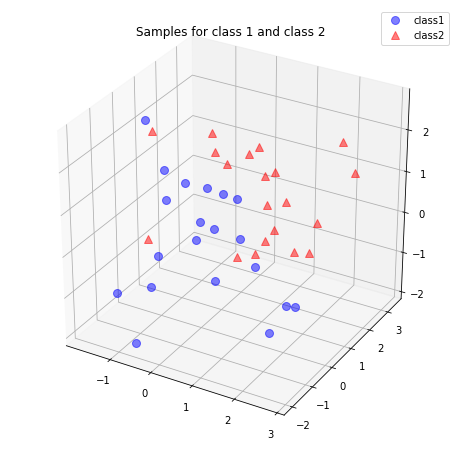

In [3]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

# how the samples of our two classes ω1 and ω2 are distributed, let us plot them in a 3D scatter plot.

In [0]:
##PCA Starts 

# 1 - taking whole data set without taking labels 

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [7]:
all_samples[0:]

array([[ 2.14609948e-01, -8.85434083e-01, -4.55312645e-01,
         9.48246135e-01,  2.24035403e+00, -1.40725419e+00,
         6.92814679e-01,  3.06157294e-01,  1.23173993e+00,
         1.83246415e-01, -7.73434933e-01,  3.20779061e-01,
        -9.31006628e-01,  4.49617661e-02, -1.72091768e+00,
        -5.53736230e-01,  9.70440579e-01,  1.57648929e+00,
         2.33655173e-01, -4.37556277e-01,  1.33927692e+00,
         1.04533022e+00,  2.20180459e+00,  1.27000938e+00,
         6.48649205e-01,  1.16885224e+00,  1.80740635e+00,
         1.82744309e+00,  6.47500635e-01,  1.22668012e+00,
        -1.76179330e+00,  1.41463884e+00,  2.82638653e+00,
        -4.30159131e-01, -7.44355343e-01,  2.44985013e+00,
         2.23159994e+00,  5.83532196e-01,  3.60364970e-01,
         1.20272812e+00],
       [-6.10203885e-01,  4.69809107e-02, -1.13070087e+00,
         7.41479905e-01,  8.25953429e-02, -1.27220898e+00,
        -6.82836608e-01, -1.28437361e+00,  1.78228244e+00,
        -3.63597139e-01, -1.23

In [8]:
all_samples[2:]

array([[ 3.35492837e-01,  1.41771267e+00, -3.41422078e-02,
        -6.93809292e-01, -1.00367394e+00, -1.15047676e+00,
        -5.05974637e-01,  1.98207014e+00, -2.06981655e+00,
         6.33517707e-01,  8.09127645e-01,  3.47320584e-01,
         2.86269400e+00,  1.15723515e+00, -2.07689357e+00,
        -1.79540016e+00,  1.32917927e+00, -1.89994520e+00,
        -5.10671297e-01,  1.83824684e-01,  9.98371208e-01,
         2.20727547e+00,  3.35819851e-01,  1.56398838e+00,
         2.49342120e+00, -1.13093464e-01,  1.23942633e+00,
         7.61150988e-01,  1.80909273e+00, -6.50951289e-01,
         1.68932682e+00,  3.47604930e-01,  2.68620539e+00,
         1.88610160e+00,  2.42991557e-01,  1.22911652e+00,
        -1.65570224e-03, -4.81930623e-01,  1.69011938e+00,
         1.57879232e+00]])

In [11]:
## 2 - compute the D - dimension mean vector 

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.57786468]
 [0.34875596]
 [0.52071362]]


In [10]:
all_samples.shape[0]

3

In [21]:
# #a) Computing the Scatter Matrix
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):

  scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)

  print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[0.131954   0.34834671 0.06728233]
 [0.34834671 0.91960399 0.17761929]
 [0.06728233 0.17761929 0.03430674]]
Scatter Matrix:
 [[ 2.27319728  0.78993377 -1.24529528]
 [ 0.78993377  1.01067217 -0.09307265]
 [-1.24529528 -0.09307265  0.83891404]]
Scatter Matrix:
 [[ 3.34065268  2.31847503 -0.67203082]
 [ 2.31847503  3.19946471  0.7278126 ]
 [-0.67203082  0.7278126   1.14677902]]
Scatter Matrix:
 [[ 3.4778351   2.4639327  -1.12186758]
 [ 2.4639327   3.3536968   0.25084037]
 [-1.12186758  0.25084037  2.62184491]]
Scatter Matrix:
 [[ 6.24170591  2.0214435  -3.65614565]
 [ 2.0214435   3.42453828  0.65657231]
 [-3.65614565  0.65657231  4.94560234]]
Scatter Matrix:
 [[10.18240285  5.2392516  -0.33863409]
 [ 5.2392516   6.05206563  3.36551333]
 [-0.33863409  3.36551333  7.73847962]]
Scatter Matrix:
 [[10.19561635  5.12067004 -0.4566519 ]
 [ 5.12067004  7.11624886  4.42463731]
 [-0.4566519   4.42463731  8.79256839]]
Scatter Matrix:
 [[10.26944126  5.56440341 -0.85371326]
 [ 5.564

In [22]:
#b calculate covariance matrix 

cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.34898852 0.38637061 0.10451915]
 [0.38637061 1.16839893 0.02377686]
 [0.10451915 0.02377686 1.73965218]]


In [23]:
#4 Compute the eigen vectors and eigen values

# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    #print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.62563478]
 [-0.77829547]
 [-0.05326609]]
Eigenvalue 1 from covariance matrix: 0.8594412180260759
----------------------------------------
Eigenvector 2: 
[[-0.63625553]
 [-0.54857976]
 [ 0.54243815]]
Eigenvalue 2 from covariance matrix: 1.5930098537821584
----------------------------------------
Eigenvector 3: 
[[0.45139786]
 [0.30547733]
 [0.83840538]]
Eigenvalue 3 from covariance matrix: 1.8045885592644606
----------------------------------------


Populating the interactive namespace from numpy and matplotlib


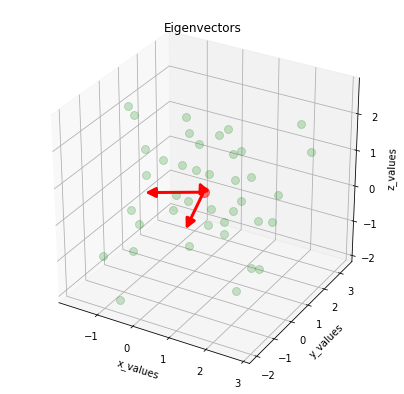

In [24]:
#Visualize the eigen vector 

%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [25]:
#Sorting the eigenvectors by decreasing eigenvalues

#our goals is We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto 
#a smaller subspace, 


#let's see which eigen vector to keep and which to discard 

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

70.37895381131396
62.127384297504214
33.51820750301697


In [26]:
## chosing k eigen vector with largest eigen values
##For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the 
##two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix WW.

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.45139786 -0.63625553]
 [ 0.30547733 -0.54857976]
 [ 0.83840538  0.54243815]]


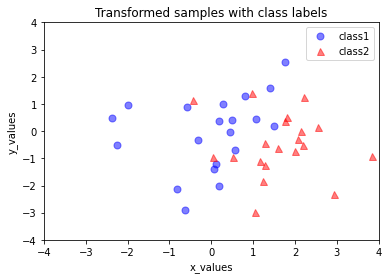

In [27]:
#Transforming the samples onto the new subspace

#In the last step, we use the 2×3-dimensional matrix W
#that we just computed to transform our samples onto the new subspace via the equation y= WT×x.

transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."


plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()